# Funneled tori

In [1]:
from colorsys import hls_to_rgb

import numpy as np
import matplotlib.pyplot as plt

from pyzeal.rootfinders.rootfinder import RootFinder
from pyzeal.pyzeal_types.algorithm_types import AlgorithmTypes
from pyzeal.pyzeal_types.estimator_types import EstimatorTypes
from pyzeal.settings.json_settings_service import JSONSettingsService

from pyzeta.core.pyzeta_types.function_systems import FunctionSystemType
from pyzeta.core.pyzeta_types.map_systems import MapSystemType

from pyzeta.framework.initialization.initialization_handler import (
    PyZetaInitializationHandler,
)
from pyzeta.core.zetas.selberg_zeta import SelbergZeta
from pyzeta.core.pyzeta_types.integrals import OrbitIntegralType
from pyzeta.core.zetas.wzeta import WeightedZeta
from pyzeta.core.distributions.ruelle_distribution import RuelleDistribution

PyZetaInitializationHandler.initPyZetaServices()
# deactivate PyZEAL progress bar
JSONSettingsService().verbose = False

In [2]:
import pyzeta.geometry.geodesic
print(pyzeta.geometry.geodesic.__file__)

import pyzeta.geometry.sl2r
print(pyzeta.geometry.sl2r.__file__)

import pyzeta.geometry.visuals
print(pyzeta.geometry.visuals.__file__)

import pyzeta.geometry.helpers
print(pyzeta.geometry.helpers.__file__)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyzeta/geometry/geodesic.py
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyzeta/geometry/sl2r.py
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyzeta/geometry/visuals.py
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyzeta/geometry/helpers.py


## $Y(10,10,\frac{\pi}{2})$ up to 400

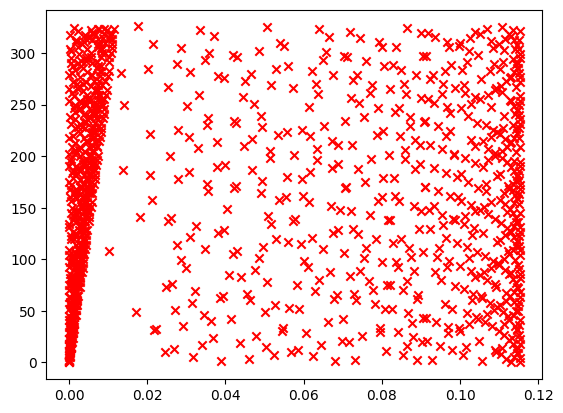

In [3]:
# calculate quantum resonances for non-geometric torus coordinate choice
initArgs = {"outerLen": 10.0, "innerLen": 10.0, "angle": np.pi / 2.0}
nMax = 6

systemType = FunctionSystemType.FUNNEL_TORUS
color = "red"
marker = "x"

zeta = SelbergZeta(
    functionSystem=systemType,
    systemInitArgs=initArgs,
)

finder = RootFinder(
    f=lambda s: zeta(s, nMax=nMax),
    algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
    estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
)

finder.calculateRoots(reRan=(-0.0, 0.12), imRan=(-0.0, 400.0), precision=(3, 3))

plt.scatter(finder.roots.real, finder.roots.imag, c=color, marker=marker)

I stopped the process, as we can see it didn't finish to compute all the resonances